# "Write a Data Science Blog Post" Project

## Section 1: Business Understanding

In this project, i used Seattle AirBNB data, in which it includes information of the listings offered in Seattle, WA.
after exploring the data, I got curious about the following questions:


<B>1. How many listings are in each neighbourhood? </B>
  
<B>2. Which hosts are running a business with multiple listings and where are they based? </B>


<B>3. Average of prices for each neighborhood?</B>


<B>4. and building a model for Price Predections for listings</B>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Section 2: Data Understanding

Gather and explore data

In [2]:
df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print("There are", num_rows,"rows in the dataset, and", num_cols, "columns")

There are 3806 rows in the dataset, and 92 columns


In [4]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3806 non-null   int64  
 1   listing_url                       3806 non-null   object 
 2   scrape_id                         3806 non-null   float64
 3   last_scraped                      3806 non-null   object 
 4   name                              3806 non-null   object 
 5   summary                           3629 non-null   object 
 6   space                             3239 non-null   object 
 7   description                       3806 non-null   object 
 8   experiences_offered               3806 non-null   object 
 9   neighborhood_overview             2776 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
#Provide a set of columns with more than 50% of the values missing

most_missing_cols = set(df.columns[df.isnull().mean() > 0.5])

print(most_missing_cols)
# If needed, i will deal with these columns, otherwise i will ignore them

{'security_deposit', 'license', 'square_feet', 'monthly_price'}


## Section 3: Data Preparation

<h4>As my aim is to build a model to predict the prices, in the below section, I will prepare the data for that model<h4/>

In [6]:
#First, creating a dataframe that incudes all the selected features; i have selected some of quantitative fields that considered as listing features

df_listings=df[['accommodates','bathrooms','bedrooms','cleaning_fee', 'guests_included', 'extra_people','review_scores_value','price']]

<AxesSubplot:>

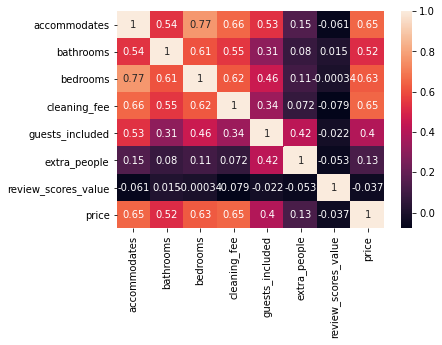

In [7]:
#Creating a heatmap to see correlation between the selected features and the target variable
sns.heatmap(df_listings.corr(), annot=True)

We can see from the heatmap the features with high and low correlations with our target, i will be execluding the features with low correlation.

In [8]:
#Reassigning the df_listings dataframe
df_listings=df[['accommodates','bathrooms','bedrooms','cleaning_fee', 'guests_included', 'price']]

In [9]:
#Checking for null values
df_listings.isnull().sum()

accommodates          0
bathrooms            16
bedrooms              6
cleaning_fee       1028
guests_included       0
price                 0
dtype: int64

In [10]:
#Handling missing values
#Since the missing values in the [bathrooms] and [bedrooms] columns are proportionally small, i will delete the rows with missing values
df_listings= df_listings.dropna(subset=['bathrooms','bedrooms'], axis=0)

In [11]:
#Handling missing values
#For the [cleaning_fee] column, there are 1028 missing values. Deleting those values would cause loosing a lot of information so I chose to impute the missing values with the mean
df_listings['cleaning_fee']= df_listings['cleaning_fee'].replace(np.NaN, df_listings['cleaning_fee'].mean())


In [12]:
#check the dataframe info to make sure

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3784 entries, 0 to 3805
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     3784 non-null   int64  
 1   bathrooms        3784 non-null   float64
 2   bedrooms         3784 non-null   float64
 3   cleaning_fee     3784 non-null   float64
 4   guests_included  3784 non-null   int64  
 5   price            3784 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 206.9 KB


so now the dataset has no null values after deleting 22 records and imputing the cleaning fee missing values with the mean

## Section 4: Modeling

After the dataset is cleansed, I'm ready to go with the model building. My aim is to build a model to predect listings prices based on the selected listings features

In [13]:
#splitting df_listings into two datasets 
X= df_listings[['accommodates','bathrooms','bedrooms','guests_included', 'cleaning_fee']]

Y= df_listings['price']

In [14]:
#splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2648, 5)
(1136, 5)
(2648,)
(1136,)


In [15]:
#Instantiate and fitting the model
lm= LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
#Predict
predictions = lm.predict(X_test)

In [17]:
#Showing the difference between the actual and predicted value
price_predictions= pd.DataFrame({'Actual':Y_test,'Predicted':predictions})
price_predictions['Difference']=np.abs(price_predictions.Actual-price_predictions.Predicted)
price_predictions.head(10)

,Actual,Predicted,Difference
315,70,97.342828,27.342828
2035,52,77.367073,25.367073
789,110,120.481799,10.481799
1900,56,102.188212,46.188212
1232,139,113.431363,25.568637
1315,205,137.872576,67.127424
1699,150,113.431363,36.568637
3243,85,97.342828,12.342828
596,73,127.970086,54.970086
678,115,120.496412,5.496412


In [19]:
#Compute a score for your model fit on all the data, and show how many rows you predicted for
rsquared_score = r2_score(Y_test, predictions)
length_y_test = len(Y_test)
"The r-squared score for the model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for the model was 0.5592947947993471 on 1136 values.'

so that means that approximately half of the observed variation can be explained by the model's inputs.

In [20]:
#Showing coefficient for the variables to determine feature importance 
coeff_df= pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
accommodates,11.895820
bathrooms,19.778120
bedrooms,16.268436
guests_included,4.845384
cleaning_fee,0.483077


The coffecients tell us that for every coffecient[column] increase, we will have one unit increase in the price.

## Section 5: Evaluation

Answering the questions

<h3> 1- How many listings are in each neighbourhood? <h2/>

In [230]:
# so here i'm using the counts formulla to get the number and list of all included neighbours 

Count_of_Listings= pd.DataFrame(df['neighbourhood_group_cleansed'].value_counts())


print(Count_of_Listings)

                     neighbourhood_group_cleansed
Other neighborhoods                           789
Capitol Hill                                  566
Downtown                                      528
Central Area                                  369
Queen Anne                                    295
Ballard                                       228
West Seattle                                  203
Rainier Valley                                158
University District                           122
Beacon Hill                                   118
Cascade                                        89
Northgate                                      80
Delridge                                       79
Lake City                                      66
Magnolia                                       61
Seward Park                                    44
Interbay                                       11


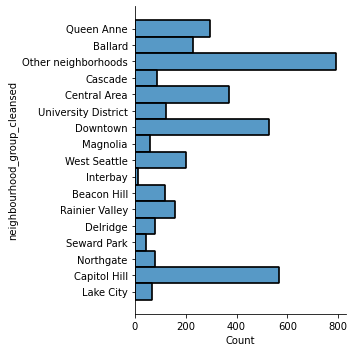

In [231]:
#Visualizing result
sns.displot(y='neighbourhood_group_cleansed', bins=5, data=df)

from the above insights, we can determine which neighborhood has the highest listings in Seattle, although there are nearly 800 records with no clear neighborhood name but I can tell that Capitol Hill won with the highest listings included in the dataset.

<h3> 2- Which hosts are running a business with multiple listings? <h3/>
    

In [232]:
#To get the results, I have created a query to get the hosts who own more than one listings and then display their other information using a dataframe

Hosts=df.query("host_total_listings_count > 1")
Hosts_Multiple_Listings= pd.DataFrame(Hosts[['host_id','host_name','host_location', 'host_neighbourhood', 'host_total_listings_count',  'host_response_time', 'host_response_rate']]).drop_duplicates()
Hosts_Multiple_Listings.set_index("host_id", inplace =True)
display(Hosts_Multiple_Listings)

,host_name,host_location,host_neighbourhood,host_total_listings_count,host_response_time,host_response_rate
host_id,,,,,,
956883,Maija,"Seattle, Washington, United States",Queen Anne,3.0,within a few hours,96%
5177328,Andrea,"Seattle, Washington, United States",Queen Anne,6.0,within an hour,98%
16708587,Jill,"Seattle, Washington, United States",Queen Anne,2.0,within a few hours,67%
1452570,Emily,"Seattle, Washington, United States",Queen Anne,2.0,within an hour,100%
4016632,Jean-Marc,"Seattle, Washington, United States",Queen Anne,5.0,within an hour,100%
...,...,...,...,...,...,...
39845529,Bethany,"Seattle, Washington, United States",Fremont,2.0,within a day,100%
7964921,Charlie & Sarah,"Seattle, Washington, United States",Fremont,2.0,within a few hours,100%
8462864,Josh,US,NaN,2.0,within an hour,93%


In [233]:
#Creating a function to get the top 10 from Hosts_Multiple_Listings dataframe based on a specific column
def top_hosts(df, no_of_rows, col):
    
    '''
     Input:
     
     df - the pandas dataframe the user wants to get the values from
     no_of_rows - number of rows (top values) the user wants to get
     col - the numeric column the user wants to get the highest values based on
     
     Output:
     
     selected_hosts - a dataframe of the highest values based on the column and number of rows the user specified
     
    '''
   
    selected_hosts= df.nlargest(no_of_rows, columns= col, keep='first')
    return selected_hosts

  

In [234]:
top_hosts(Hosts_Multiple_Listings, 10, ['host_total_listings_count'])

,host_name,host_location,host_neighbourhood,host_total_listings_count,host_response_time,host_response_rate
host_id,,,,,,
4962900,Jordan,"Spokane, Washington, United States",Central Business District,169.0,within an hour,99%
661691,Katy,"Vancouver, Washington, United States",Anaheim,163.0,within a few hours,92%
103427,Magalie,"West Hollywood, California, United States",Anaheim,84.0,within a day,87%
8534462,Daniela,"Seattle, Washington, United States",Belltown,48.0,within an hour,100%
1243056,Andrew,"Seattle, Washington, United States",Capitol Hill,37.0,within an hour,90%
430709,Sea To Sky Rentals,"Seattle, Washington, United States",Belltown,36.0,within a day,88%
74305,Darik,"Kent, Washington, United States",Belltown,34.0,within a few hours,94%
3074414,Melissa,"Seattle, Washington, United States",Ravenna,34.0,within a few hours,80%
26967583,Dario,"Seattle, Washington, United States",University District,21.0,within an hour,98%


From the above insights, I have got a list of all the hosts whome own multiple listings in Seattle and then the top 10 hosts based on the total owned listings.

<h3> 3-Average of prices for each neighbourhood <h3/>

In [235]:
# using the mean formulla to get the average of prices for each neighbourhood

Avg_prices_neighbourhood= pd.DataFrame(df.groupby('neighbourhood_group_cleansed')['price'].agg(mean).sort_values())
display(Avg_prices_neighbourhood)

,price
neighbourhood_group_cleansed,
Delridge,83.278481
Northgate,88.550000
Rainier Valley,90.740506
Lake City,91.484848
University District,93.639344
Beacon Hill,94.669492
Seward Park,108.477273
Interbay,109.727273
Other neighborhoods,119.261090


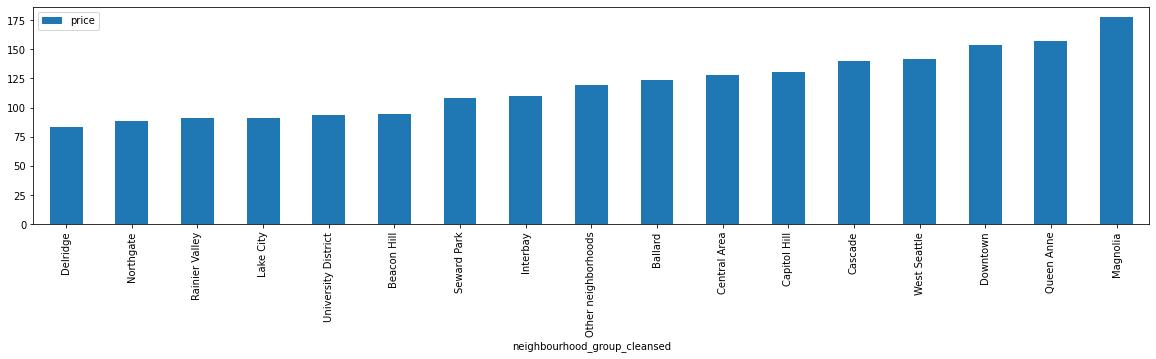

In [240]:
#Visualizing result
Area_Chart= Avg_prices_neighbourhood.plot.bar(figsize=(20,4))
plt.show()


From the above analysis, I have got the average of daily prices of each neighborhoods. As from the bar chart, Magnolia neghiborhood has the heighest daily price where Delridge has the lowest.